In [32]:
!pip install micromlgen

In [33]:
from micromlgen import port

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [35]:
df = pd.read_csv("/content/soil_data.csv")
df.head()

,Time,Humidity,Atmospheric_Temp,Soil_Temp,Soil_Moisture,Dew_Point
0,2017-06-11 21:00:21+00:00,25.252367,15.487149,12.457884,63.077305,23.918315
1,2017-06-11 22:00:21+00:00,33.304246,12.115891,8.514263,40.097357,31.542544
2,2017-06-11 23:00:21+00:00,24.072051,17.319203,11.913326,100.141916,21.142841
3,2017-06-12 00:00:21+00:00,45.026218,15.865805,14.700958,64.638742,42.217799
4,2017-06-12 01:00:21+00:00,41.490917,13.842739,8.495549,97.964697,38.257137


In [36]:
df.drop(['Time'], axis=1, inplace=True)

In [37]:
def classify_moisture(value):
    if value < 35:
        return "Dry"
    elif value <= 65:
        return "Optimal"
    else:
        return "Wet"

df["Soil_Condition"] = df["Soil_Moisture"].apply(classify_moisture)

In [38]:
X = df[["Humidity", "Atmospheric_Temp", "Soil_Temp", "Dew_Point"]]
y = df["Soil_Condition"]

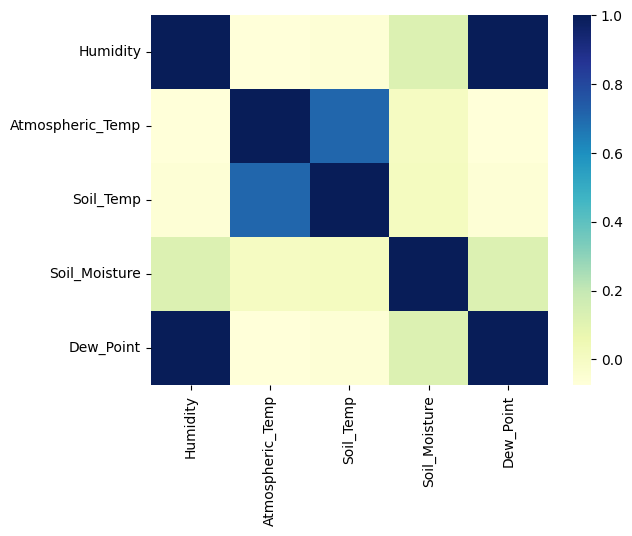

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu")
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
model = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=42)

In [41]:
c_code = port(model, classmap={i: c for i, c in enumerate(model.classes_)})
with open("SoilMoistureModel.h", "w") as f:
    f.write(c_code)

print("model exported ")

model exported 
